> # **단순 선형 회귀**

## < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

##### 1. 데이터 수집 및 탐색 
##### 2. 모델 클래스 선택
##### 3. 모델 객체 생성 
##### 4. 모델에 사용할 특성 데이터셋 및 타겟 데이터셋 준비 
##### 5. 객체에 대해 학습 수행 : fit()
##### 6. 실행 객체 또는 추정된 모델에 대해 예측 수행 : predict()
##### 7. 분석 결과 평가 : MSE, RMSE, R2(결정계수)

### 필요한 모듈 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [2]:
beer = pd.read_csv("/Users/hayeon/Downloads/데청캠/회귀분석/data/beer.csv")
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

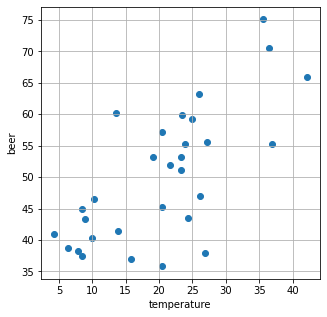

In [3]:
plt.figure(figsize=(5,5)) 
plt.scatter(beer['temperature'], beer['beer']) 
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

* 독립변수 temperature

In [4]:
beer['temperature']

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

* 종속변수 beer

In [5]:
# 종속 변수 확인, 레코드 수 확인
print(beer['beer'])
print(len(beer))

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64
30


###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [6]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
import numpy as np 

#독립변수, 종속변수 데이터셋 준비
x = np.array(beer['temperature']).reshape(-1,1)
y = beer['beer']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(\
                                                   x, y, test_size=0.2, \
                                                   random_state=1)

### 모델 구축

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [8]:
# 학습 수행
reg = lr.fit(X_train, y_train)

##### -> 학습을 통해 회귀계수, 절편을 갖게 됨.
* coefficient : 계수 
* intercept : 절편

In [9]:
reg.coef_, reg.intercept_ 

(array([0.69705648]), 36.06666541566105)

In [10]:
#회귀식
print("y = {:2f}X + {:.3f}".format(reg.coef_[0], reg.intercept_))
# 계수는 어레이 형식이기 때문에  coef_[0]으로 표시

y = 0.697056X + 36.067


In [11]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred,2)) 

# np.round는 그냥 round와는 다르게 모든 수에 똑같이 다 적용

[60.81 50.36 54.33 50.36 41.92 43.18]


In [12]:
X_test

array([[35.5],
       [20.5],
       [26.2],
       [20.5],
       [ 8.4],
       [10.2]])

In [13]:
y_pred

array([60.81217046, 50.35632326, 54.32954519, 50.35632326, 41.92193985,
       43.17664151])

### 모델 성능 평가

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

#MSE
mse = mean_squared_error(y_test, y_pred) # 예측한 정답과의 차이 = 에러

#RMSE
rmse = np.sqrt(mse)

print("MSE:", np.round(mse,3))
print("RMSE:", np.round(rmse,3))

MSE: 91.347
RMSE: 9.558


In [15]:
#결정계수 R2 ** 가장 중요 (예측분산/실제분산)
r2 = r2_score(y_test, y_pred) # 필요한게 예측, 실제니까 실제정답, 예측정답 입력
print("R2: ", np.round(r2,3)) 
# 0.485정도 겹쳐있음

R2:  0.485


In [16]:
print(reg.score(X_test, y_test))

0.48456481297951504


y는 맥주판매량 
RMSE가 9.558이었으니까 맥주 소비량이 그정도. 

### 시각화

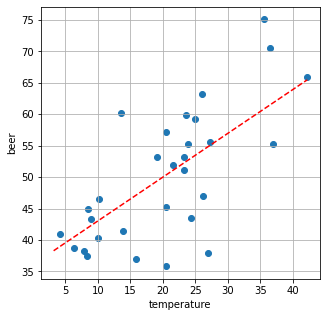

In [17]:
#y = 0.697056X + 36.06 시각화
# 회귀식을 보여주는 코드
plt.figure(figsize=(5,5))
xx = np.arange(beer['temperature'].min() -1,  # 독립변수의 최소값보다 한칸 이전
               beer['temperature'].max() +1) # 1만큼만 오른쪽으로 가줘 

# 실제 데이터의 최소 최대보다 한칸씩 넓혀서 회귀식 그리려 한다.
yy = reg.predict(xx.reshape(len(xx),1))# 2차원 어레이로 바꾸는 과정

plt.plot(xx, yy, linestyle='--', color='red')

# 수집한 데이터셋 시각화 (원래데이터를 보여주는 코드)
plt.scatter(beer['temperature'], beer['beer'])

plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

> # **Case1. 나이, 키의 관계 회귀 분석**

In [18]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.linear_model import LinearRegression

#### 데이터 생성/수집

In [19]:
data_df = pd.read_csv("/Users/hayeon/Downloads/데청캠/회귀분석/data/age_height.csv" )
data_df

,age(X),height(T)
0,15.425550,170.910131
1,23.008112,160.675599
2,5.002859,129.002066
3,12.558314,159.701396
4,8.668897,155.460589
5,7.308465,140.561344
6,9.656505,153.654664
7,13.639018,159.429396
8,14.919187,164.704239
9,18.470418,169.645276


#### 데이터 탐색

In [20]:
# 데이터 분포 시각화

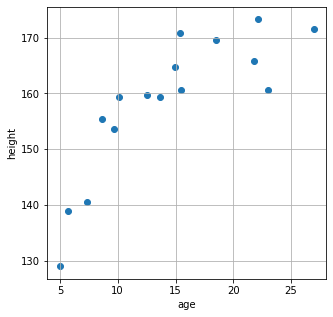

In [21]:
plt.figure(figsize=(5,5)) # figur : 5,5 사이즈의 캔버스 준비 
plt.scatter(data_df['age(X)'], data_df['height(T)']) # 스캐터 뒤에 x, y좌표 쓰기 x, y 1:1 매핑해서 좌표평면에 그리기 
plt.xlabel('age')
plt.ylabel('height')
plt.grid()
plt.show()

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [22]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
X = np.array(data_df['age(X)']).reshape(-1,1)
y = data_df['height(T)']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                   random_state =1)

In [23]:
# 모델 구축 및 예측
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
reg = lr.fit(X_train, y_train)

print(reg.coef_)
print(reg.intercept_)

[1.43863478]
138.78419382830361


In [24]:
# 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred, 2))

[156.85 177.56 158.41 145.98]


In [25]:
# 모델 성능 평가
from sklearn.metrics import mean_squared_error, r2_score


#MSE
mse = mean_squared_error(y_test, y_pred) # 빼놓은 6개 데이터의 정답, 아까 예측한 정답과의 차이 = 에러

#RMSE
rmse = np.sqrt(mse)

print("MSE:", np.round(mse,3))
print("RMSE:", np.round(rmse,3))


#결정계수 R2
r2 = r2_score(y_test, y_pred) # 필요한게 예측, 실제니까 실제정답, 예측정답 넣어준다.
print("R2: ", np.round(r2,3))


#회귀식
print(reg.coef_, reg.intercept_)
print("y = {:2f}X + {:.3f}".format(reg.coef_[0], reg.intercept_))

MSE: 83.495
RMSE: 9.138
R2:  0.663
[1.43863478] 138.78419382830361
y = 1.438635X + 138.784


In [26]:
xx=xx.reshape(-1,1)

In [27]:
yy=yy.reshape(-1,1)

In [28]:
yy

array([[38.29724615],
       [38.99430263],
       [39.69135911],
       [40.38841559],
       [41.08547207],
       [41.78252855],
       [42.47958503],
       [43.17664151],
       [43.87369799],
       [44.57075447],
       [45.26781095],
       [45.96486743],
       [46.66192391],
       [47.35898039],
       [48.05603687],
       [48.75309335],
       [49.45014983],
       [50.14720631],
       [50.84426279],
       [51.54131927],
       [52.23837575],
       [52.93543223],
       [53.63248871],
       [54.32954519],
       [55.02660167],
       [55.72365815],
       [56.42071463],
       [57.11777111],
       [57.81482759],
       [58.51188407],
       [59.20894055],
       [59.90599703],
       [60.60305351],
       [61.30010999],
       [61.99716647],
       [62.69422295],
       [63.39127943],
       [64.08833591],
       [64.78539239],
       [65.48244887]])

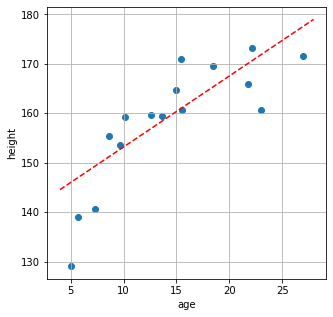

In [30]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화


# 우리가 구한 회귀식을 보여주는 코드
plt.figure(figsize=(5,5))
xx = np.linspace(data_df['age(X)'].min() -1, 
               data_df['age(X)'].max() +1)
# 실제 데이터의 최소 최대보다 한칸씩 넓혀서 회귀식 그리려 한다.
yy = reg.predict(xx.reshape(-1,1))

plt.plot(xx, yy, linestyle='--', color='red')
# 수집한 데이터셋 시각화 (원래데이터를 보여주는 코드)
plt.scatter(data_df['age(X)'], data_df['height(T)'])

plt.xlabel('age')
plt.ylabel('height')
plt.grid()
plt.show()


# < 스탯츠모델에서 단순선형회귀 수행>

In [31]:
#스탯츠모델 import
import statsmodels.api as sm 

# 맥주 데이터 
# 데이터 생성
beer = pd.read_csv('/Users/hayeon/Downloads/데청캠/회귀분석/data/beer.csv')

#독립변수, 종속변수 데이터셋 준비
import numpy as np

X = np.array(beer['temperature']).reshape(-1,1)
y = beer['beer']


X_train, X_test, y_train, y_test = train_test_split(\
                                                   X, y, test_size=0.2,
                                                   random_state=1)

# 모델 객체를 생성할 때 스텟츠에서는 상수항이 더해진 입력변수를 요구하기 때문에 
# X- train, x_test에 상수항을 더해주는 과정이 필요하다. add_constant 
# 새로운 X_train, X_test 
X_train = sm.add_constant(X_train) # 상수항을 미리 더해줘야한다. (스탯츠에서는)X-train에 넣어줘야함
X_test = sm.add_constant(X_test)

##### =================================

In [32]:
X_test

array([[ 1. , 35.5],
       [ 1. , 20.5],
       [ 1. , 26.2],
       [ 1. , 20.5],
       [ 1. ,  8.4],
       [ 1. , 10.2]])

In [33]:
X_test = sm.add_constant(X_test)
X_test # 각각에 상수항 1을 더해준 것 add_constant (절편을 계산하기 위해. 이런 절차를 요구한다.)

array([[ 1. , 35.5],
       [ 1. , 20.5],
       [ 1. , 26.2],
       [ 1. , 20.5],
       [ 1. ,  8.4],
       [ 1. , 10.2]])

##### ==========================

In [34]:
# 스탯츠모델 (최소제곱법)
lr = sm.OLS(y_train, X_train) # 순서 아까와 다르게 바뀌었으니 주의
reg = lr.fit()

In [35]:
# 성능 평가
y_pred = reg.predict(X_test)

print(reg.summary()) # summary는 사이킷에는 없고 스탯츠에만 있다.
# OLS 모델이고 Least - 최소제곱법을 사용해! 
# DEp.- 종속은 맥주야! 
# F 검정의 통계량이 의미하는 것 : 0.05 보다 작으면 모형의 유의성이 인정된다. = 의미있는 모델이다. 
# const : coef- 절편 / x1의 coef : 기울기 ?? 
# p 값이 0.05보다 크면 유의미하지 않다는 의미. 0.00이라는 건 아주 작은순데 소수점 세자리까지 잘라서 저렇게 보임 
# => 의미있는 회귀 


                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           9.50e-05
Time:                        16:57:43   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.0

# 응용2: 보스턴 집값 선형 회귀(statsmodel)

### 데이터 수집

In [36]:
from sklearn.datasets import load_boston

boston = load_boston() # 생성자 만들어줘야함

### 데이터 탐색

In [37]:
print(boston.DESCR)
# 샘플 506개 506개의 구역으로 나눴다.
# 독립변수 13개 - 숫자, 범주형 자료 있다. 
# 네번째 속성의 medium value가 종속변수다.
# MEDV가 타겟 (종속)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [38]:
dir(boston) # 

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [39]:
boston.feature_names # 독립변수 MEDV를 제외한 13개

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [40]:
boston.target[:5] # 24 = 2만 4천 (천달러단위라고 descr에 나와있음)

array([24. , 21.6, 34.7, 33.4, 36.2])

In [41]:
boston.data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

### 데이터 준비

In [42]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환

In [43]:
import pandas as pd

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [44]:
# 단순선형회귀할건데 독립변수가 너무 많아! 
# 독립 1 종속 1만 가져다가 머신러닝 알고리즘의 데이터로 사용할 것이다. 

In [45]:
df.head() # 다 독립변수다. 단순선형회귀를 하기 위해 독립변수 1개만 가져갈것 RM = room

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [46]:
x = df['RM'] # X는 시리즈가 된다. 머신러닝 fit에 넣기 위해서는 2차원으로 만들어야 함 -> 2차원 df로 만들어버리자
x = pd.DataFrame(df['RM'])
# RM 한 열만 가져오니까 시리즈였는데 데이터프레임으로 만드니까 2차원으로 바뀌었다. 

y = boston.target

In [47]:
x

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [48]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

#### x는 2차원, y는 1차원으로 정리

### 학습용/ 검증용 데이터 분리

In [49]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,\
                                                   random_state =1)



### 모델 구축

In [50]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
reg = lr.fit(X_train, y_train)

print(reg.coef_)
print(reg.intercept_)

[8.46109164]
-30.571032410898315


### 모델 평가

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred) # reg.score()해도 똑같다.
print("MSE:", np.round(mse,3))
print("RMSE: ", np.round(rmse,3))
print("R2:", np.round(r2,3))

MSE: 36.517
RMSE:  6.043
R2: 0.602


In [52]:
reg.coef_, reg.intercept_

(array([8.46109164]), -30.571032410898315)

### 시각화

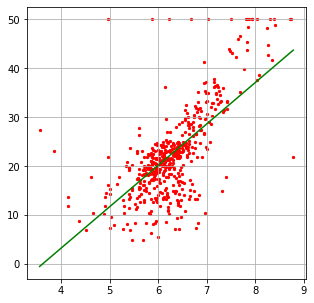

In [53]:
# 방의 개수와 주택중간가격 관계를 시각화 

# y = 8.46x - 30.57
plt.figure(figsize = (5,5))
plt.scatter(x, y, c ='r', s=5) #s = 점의 사이즈 (스캐터 점)
xx = np.linspace(x.min(), x.max())
yy = reg.predict(xx.reshape(len(xx), 1))
plt.plot(xx, yy, linestyle='-', color='g')
plt.grid()
plt.show()
